<a href="https://colab.research.google.com/github/carlottaviappiani/MLPNS_CViappiani/blob/main/CarlottaViappiani_mlpns23_final_may.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

copy the notebook to your drive before you start ^^^
# MLPNS 2023 May exam

#RULES: 
- ## WORK ALONE

- ## ASK QUESTIONS IN #exam_may ON SLACK (no private message unless I direct you to) - questions are very welcome! if you find any issues or mistakes in the description let me know as well!

- ## TURN IN YOUR WORK WITHIN 72 HOURS BY SHARING YOUR NOTEBOOK WITH ME  - by Sunday 5/14 10AM (see instructions on slack #exam_may

- ## DO NOT POST ON GITHUB. 

Schedule an oral exam within three weeks of the complition of the written exam at https://calendly.com/fbbianco/one-on-one. In the oral session you will duscuss and explain your choices. Your grade will be beased on this discussion, not on the written performance itself (i.e. even if you do all the tasks in the written exam, if you cannot talk about them, describe them and motivate them you will not get a good grade and, conversely, if you have problem getting good models but you can discuss effectively what you did and what you could have done you can get a good grade).

## OVERVIEW
This is an exercise in based on the CHAMPS Competition for Predicting Molecular Properties. Specifically, you are to predict the coupling constant between two atom given the two atom types (e.g., C and H), the coupling type (e.g., 2JHC), and any features you are able to create from the molecule structure (xyz) files.

## What I expect in the written exam: 
I expect that you will perform the following tasks after having acquired the data:

- Data exploration

- Preprocessing and scaling appropriately as needed

- Model development 

- Fitting and evaluation of your model performance

- Exploration into the model performance


**All figures should have captions and axis labels** 

Please dont forget axis labels and captions! Make figures wherever apprioriate to understand the data/results (feel free to put figures in addition to the ones requested explicitly below).

**Discussion**

Put your "narrative" in text cells. Present the code neatly, deleting cells of code used for testing but leaving in all cells needed for the code to work.

I expect that you will discuss each step and to what extent it was successful, to what extent it can be improved.

I expect a justification for all your choices (e.g. how you deal with missing or redundant values, hyperparameter choices) includind a description of possible shortcomings of your choices.

**Reproducibility**

I expect your code to be reproducible and to run: _reproducible means that when I run it by Restart Kernel -> Run all I should get the exact same numbers you presented_. Where random numbers are used you should seed your random sequence (by setting a seed or the random_state if available in the model). "Running" means that your code should, run with no bugs or breaks top tp bottom; when I click Runtime RunAll the code should not stop until the last cell. Make sure you restart the kernel and rerun your code from the beginning to assure it works before you deliver it!






# TASK I :  Data Acquisition
 You can download the data from kaggle
 --- https://www.kaggle.com/competitions/champs-scalar-coupling/data (agree to the competition rules to enable download, find the command to download using python at the bottom of the page, use the kaggle software to download the data within your notebook as done for example in https://github.com/fedhere/MLPNS_FBianco/blob/main/CART/higgsbosonSearch.ipynb)

 Make sure that the data is obtained in a way that is reproducible but that it does not expose your Kaggle API keys (do not print the credentials). You will use the **training data and the structure files** only - you wont need to use the rest of the files (you can tho if you want to create more complex models). 

 (Note: the unzip will take a long time to unzip the structure folder, although you can read the info in that folder from the structures.csv file so you will not need the data in the structures folder.)

 Important: make a folder on your google drive called MLPNS23_final and put your data and work in that folder.

In [1]:
import pandas as pd
import numpy as pn
import pylab as pl
import json

In [2]:
import os

**Creazione Directory** MLPNS23_final in Drive

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
cd gdrive/My\ Drive/MLPNS23_final

/content/gdrive/My Drive/MLPNS23_final


**Caricamento dati da Kaggle**: per farlo devo spostare nella cartella che ho scelto come directory (MLPNS23_final) il file kaggle.jsan che contiene i dati utente di Kaggle

In [5]:
pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!chmod 600 kaggle.json

In [7]:
ls -l *kaggle*

-rw------- 1 root root 73 Apr 13 15:12 kaggle.json


In [8]:
envs =json.load(open('kaggle.json','r'))

In [9]:
#vediamo che tipo di contenuto ha  json (come detto sono keys e username utente Kaggle)
envs.keys()

dict_keys(['username', 'key'])

In [10]:
os.environ['KAGGLE_USERNAME']=envs['username']
os.environ['KAGGLE_KEY']=envs['key']

Ora uso l'apposito comando di Kaggle per caricare il dataset

In [11]:
!kaggle competitions download -c champs-scalar-coupling

champs-scalar-coupling.zip: Skipping, found more recently modified local copy (use --force to force download)


**Unzip** del dataset di interesse (.zip)\
*Attenzione*: per comodità, farò runnare questa cella solo una volta (quindi commento il codice): essendo un processo molto lungo il codice tiene in memoria in ogni caso i dati unzippati anche se non riavvio questa singola cella cella, ovviamente a meno di non riavviare il kernel.

In [16]:
#!unzip champs-scalar-coupling.zip

Output streaming troncato alle ultime 5000 righe.
  inflating: structures/dsgdb9nsd_128302.xyz  
  inflating: structures/dsgdb9nsd_128303.xyz  
  inflating: structures/dsgdb9nsd_128304.xyz  
  inflating: structures/dsgdb9nsd_128305.xyz  
  inflating: structures/dsgdb9nsd_128306.xyz  
  inflating: structures/dsgdb9nsd_128308.xyz  
  inflating: structures/dsgdb9nsd_128309.xyz  
  inflating: structures/dsgdb9nsd_128310.xyz  
  inflating: structures/dsgdb9nsd_128311.xyz  
  inflating: structures/dsgdb9nsd_128312.xyz  
  inflating: structures/dsgdb9nsd_128313.xyz  
  inflating: structures/dsgdb9nsd_128314.xyz  
  inflating: structures/dsgdb9nsd_128315.xyz  
  inflating: structures/dsgdb9nsd_128316.xyz  
  inflating: structures/dsgdb9nsd_128317.xyz  
  inflating: structures/dsgdb9nsd_128318.xyz  
  inflating: structures/dsgdb9nsd_128319.xyz  
  inflating: structures/dsgdb9nsd_128320.xyz  
  inflating: structures/dsgdb9nsd_128321.xyz  
  inflating: structures/dsgdb9nsd_128322.xyz  
  inflatin

I file che ci interessano sono 'train.csv' (1) e 'structures.csv' (2).

(1)  'train.csv' si trova nella directory in cui già siamo.

In [20]:
train = pd.read_csv('train.csv')
train

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.807600
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.257000
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.254800
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.254300
4,4,dsgdb9nsd_000001,2,0,1JHC,84.807400
...,...,...,...,...,...,...
4659071,4659071,dsgdb9nsd_133884,17,4,2JHC,3.543450
4659072,4659072,dsgdb9nsd_133884,17,5,3JHC,0.568997
4659073,4659073,dsgdb9nsd_133884,17,6,3JHC,1.173370
4659074,4659074,dsgdb9nsd_133884,17,7,2JHC,4.762010


(2) 'structures.csv' si trova anch'esso all'interno della directory in cui già siamo 

In [12]:
structure = pd.read_csv('structures.csv')
structure.head()

,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397


# TASK II :  Data Cleaning, Preparation, and Fusion

Read into dataframes the files _train.csv_ and _structure.csv_

Your target variable is `scalar_coupling_constant`

**Answer this Question (in a text cell)**: which kind of machine learning task are we performing if we want to predict `scalar_coupling_constant` (given the nature of this variable)

 Check and address in the train file missing and/or duplicate values:
- missing values -> remove or fill in
- duplicate entries -> remove

Merge the _structure_ values with the _training_ data. Each atom is associated with a value of x-y-z included in the structures.csv file. You need to 
- merge the structure dataframe to the train dataframe using the name of the `molecule name` and the value of `atom_index` in structure and `molecule name` and `atom_index_0` in train. 
- merge again the resulting file with structure using the `molecule name` and the value of `atom_index` in structure and `molecule name` 
 and `atom_index_1` in train

 _this is a technique we have not seen very often in class, but you can help yourself with the documentation of the method **merge** - given two dataframes df1 and df2_
```df1.merge(df1, left_on=[df1_column1, df1_column2], right_on=[df2_column1, df2_column2]...)```

 At least one variable is a multi-class categorical. Convert it to a one-hot-encoded variable (Hint: we have seen examples of this with the zipcode in the notebook in https://github.com/fedhere/MLPNS_FBianco/tree/main/OHE and in slide deck 6)


 Sanity check: compare the shape of your dataframe with mine at this point: I had 19 columns and 4503143. You do not need to have the exact shape as mine, you may have made different choices that would lead to different numbers. But you should be able to make sense of the number I have and the numbers you have based on the choices you made and the process I described above.

-------------------------------------------------------------------------------

Vogliamo predirre la costante di accoppiamento tra due atomi, le cui posizioni (x,y,z) sono memorizzate in structure. Questa è una variabile continua, in quanto possiamo pensare ad essa come uno scalare che può indicare ad esempio quanto due atomi siano affini al legame. Per questo motivo, il tipo di Machine Learning che si usa è **Supervised Learning**, ovvero abbiamo dei dati a cui sono già associate delle labels (in questo caso, le coupling costants per coppia di atomi). Quindi vogliamo predirre una variabile continua per le coppie di atomi: di conseguenza, vogliamo usare la **Regression** per predirla.\
Possiamo vedere che questa variabile è effettivamente continua 


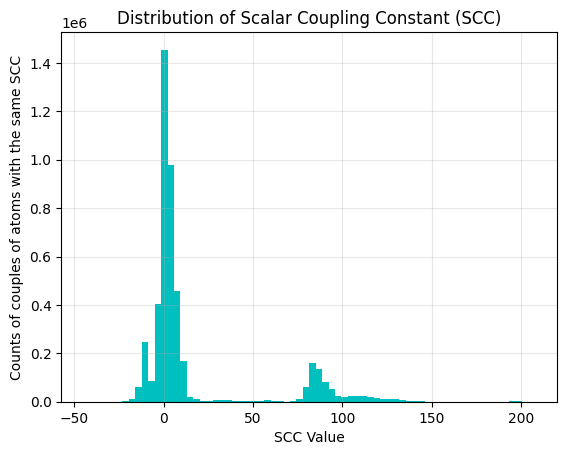

In [40]:
pl.hist(train['scalar_coupling_constant'], bins=70,color='c')
pl.xlabel('SCC Value')
pl.ylabel('Counts of couples of atoms with the same SCC')
pl.title(label='Distribution of Scalar Coupling Constant (SCC)')
pl.grid('on',alpha=0.3)

Come si nota dal grafico, i dati sono abbastanza distribuiti attorno a range di valori continui che **non** ci permettono di fare una semplice **classification** dei dati, che sarebbe poco informativa.

Ora devo ripulire il dataset:

a) Trovo i valori 'Nan' e li elimino. Vediamo innanzitutto che non ci sono missing values in quanto la dimensione di train resta inalterata; possiamo vedere che comunque per sicurezza anche facendo dropna abbiamo effettivamente un numero pari a 0 di Nan nel database.

In [41]:
train.dropna(axis=0, inplace=True) #lungo le righe (0)

In [42]:
train.shape

(4659076, 6)

In [44]:
import numpy as np
(train == np.NaN).sum()

id                          0
molecule_name               0
atom_index_0                0
atom_index_1                0
type                        0
scalar_coupling_constant    0
dtype: int64

Troviamo la stessa cosa anche per structure:

In [49]:
structure.dropna(axis=0, inplace=True) #lungo le righe (0)
structure.shape

(2358875, 6)

b) Eliminiamo i duplicati: verifichiamo se ci sono duplicati. Vediamo che di nuovo la dimensione di train resta invariata quindi non sono presenti duplicati nel dataframe.

In [48]:
train.drop_duplicates(keep='first',inplace=False).shape

(4659076, 6)

Troviamo anche qui la stessa cosa anche per structure:

In [50]:
structure.drop_duplicates(keep='first',inplace=False).shape

(2358875, 6)

Ora **uniamo** i dati dai due dataframes: vogliamo SCRIVERE

In [52]:
#COMMENTARE
merged_train=train[['molecule_name','atom_index_0','atom_index_1','scalar_coupling_constant']]

,molecule_name,atom_index_0,atom_index_1,scalar_coupling_constant
0,dsgdb9nsd_000001,1,0,84.807600
1,dsgdb9nsd_000001,1,2,-11.257000
2,dsgdb9nsd_000001,1,3,-11.254800
3,dsgdb9nsd_000001,1,4,-11.254300
4,dsgdb9nsd_000001,2,0,84.807400
...,...,...,...,...
4659071,dsgdb9nsd_133884,17,4,3.543450
4659072,dsgdb9nsd_133884,17,5,0.568997
4659073,dsgdb9nsd_133884,17,6,1.173370
4659074,dsgdb9nsd_133884,17,7,4.762010


In [ ]:
merged_structure=

In [60]:
#COMMENTARE
bond=train.iloc[0]
molecule=structure.loc[structure['molecule_name']==bond['molecule_name']]
atom_0=molecule.loc[structure['atom_index']==bond['atom_index_0']]
atom_1=molecule.loc[structure['atom_index']==bond['atom_index_1']]
atom_0=atom_0[['atom','x','y','z']]
atom_1=atom_1[['atom','x','y','z']]
#x_0=atom_0[['atom','x']]
#y_0=atom_0[['atom','y']]
#z_0=atom_0[['atom','z']]
#x_1=atom_1[['atom','x']]
#y_1=atom_1[['atom','y']]
#z_1=atom_1[['atom','z']]
#merged_data=pd.concat([atom_0,atom_1],axis=1)
merged_data=pd.merge(left=atom_0,right=atom_1)
merged_data

,atom,x,y,z


In [ ]:
print("The original train dataset contains "
"{} features for {} molecules"......)

Identify the columns containing molecule identifiers, i.e. not properties of the molecules that should not be included in the model. Consider this when you remove duplicate data.

In [ ]:
print("Removing duplicated and missing data I lost {:.2}% of the data"......)

In [ ]:
merged_train = ...

In [ ]:
print("After the merge the dataset contains "
"{} features for {} molecules"......

In [ ]:
....

In [ ]:
print("After one-hot-encoding the dataset contains "
"{} features for {} molecules"......

In [ ]:
merged_train.shape

# TASK III :  Data Explorations

Make plot that allow you to get an idea of

- the distribution of each feature in your dataframe

- the correlation between features

Decide what you do in case you find odd distributions or strong correlations. 

(Note: for some visualization that take a lot of computational time and power, you may need to use only a subset of the dataset, for example 1 out of 10 or 100 points)

In [ ]:
...

# Task IV: model choice and preprocessing
Now its time to choose your model. 
- Justify your choice (based on the nature of the data and task to be performed)
- Prepare (scale, whiten) the data accordingly
- Split the data into train/test or train/validation/test
- Create, Run, Tune the model 

*(Hint: this is a lot of data! while you are trying out things you probably want to use only a subset of the data, like I suggested above for the visualizations. Before turning in the final version then you can run on the full dataset)*

In [ ]:
...

# Task V: model evaluation


Report on the model result

Visualize the prediction against the true values of the target variable

In [ ]:
...

# Task VI: Perform (at least) one additional task


- **If you used a linear regression model**
Try at least one CART model

- **If you used a CART model**
Make a plot of the feature importance, identify if there is a dominant feature, if so remove it (or remove the feature family altogether) and redo the fit. Can you still predict values effectively?

- **If you used a neural network**
Try change the architecture e.g. modify the number of layers, adding dropout layers to address overfitting, changing optimizer/loss/activation functions (but justify the choices on the basis of data and task)

- **If you used yet another model**
Try at least one CART model

- Alternatively, for whichever model you used
You can **use additional variables or create additional features** by manipulating and combining variables (e.g. the xyz values can be turned into distances like was done for example here https://www.kaggle.com/code/artgor/molecular-properties-eda-and-models/notebook)

In [ ]:
...